# Erasmus Neural Networks
http://michalbereta.pl/nn
## One layer of perceptrons for multiclass classification problems


## Before you start

Exacute the examples.

Then, do the tasks and send back the notebook.

Change the name of this notebook according to the schema: {YourSurname}\_{YourFirstName}\_{OriginalFileName}.

Be sure to fill all places with "YOUR ANSWER HERE".

When ready, send the notebook, with all the necessary files zipped, to the teacher.

### The example classification problem with three classes

We are going to use very simple classification problem with three classes, all of them linearly separable from each other.

Load the data from file `data_3classes_linear.txt`

The last column contains class labels, endoced as `0`, `1`, and `2`.

In [ ]:
%matplotlib notebook

import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


data = np.loadtxt('data_3classes_linear.txt')
print('data=',data)

d = data[:,-1].astype('int')
X = data[:,:-1]

print()
print('X=',X)
print()
print('d=',d)

### Data visualization

Check, that the classes can be separated with linear functions.

In [ ]:
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)


plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')



### Combining perceptrons in a layer

Each perceptron is responsible for just one class. When making the clasification decision, we check for the strongest response from among the neurons.

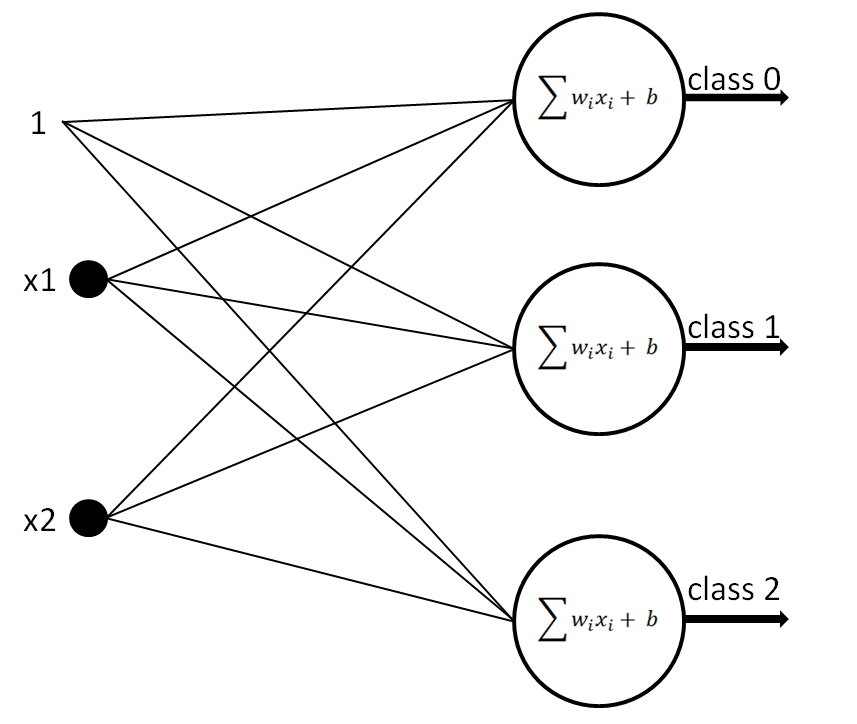

We will implement out layer of perceptrons as a class in Python.

All of the weights of all neurons are stored in one matrix, (one column for each neuron).

Biases are stored separately in a vector.

In [ ]:
class MCPerceptron:
    def __init__(self, num_of_classes, num_of_inputs):
        self.w =  -1 +2*np.random.rand(num_of_inputs, num_of_classes)  #neurons' weights as columns
        self.b = np.zeros(num_of_classes) #biases from all neurons
        self.outs = None


#example parameters
num_of_cls = 3 #number of classes
num_of_ins = 5 #number of inputs
perc = MCPerceptron(num_of_cls, num_of_ins)
print('w=',perc.w)
print('b=',perc.b)

### Forward pass

Let's add the possibility to calculate the response of the neurons.

In [ ]:
class MCPerceptron:
    def __init__(self, num_of_classes, num_of_inputs):
        self.w =  -1 +2*np.random.rand(num_of_inputs, num_of_classes)  #neurons' weights as columns
        self.b = np.zeros(num_of_classes) #biases from all neurons
        self.outs = None
    def Forward(self, X):
        self.outs = np.dot(X, self.w) + self.b
        return self.outs


#example parameters
num_of_cls = 3 #number of classes
num_of_ins = 5 #number of inputs
perc = MCPerceptron(num_of_cls, num_of_ins)    

#example random data with 10 examples
X = np.random.rand(10, num_of_ins)
print('X=',X)
Y = perc.Forward(X)
print('Y=',Y)

### Making predictions about the classes

Matrix `Y` contains in each row the responses of the neurons for a given example (row in `X`).

To make the classification decision, we have to select in each row, which column indicates the strongest response (biggest value).

In [ ]:
class MCPerceptron:
    def __init__(self, num_of_classes, num_of_inputs):
        self.w =  -1 +2*np.random.rand(num_of_inputs, num_of_classes)  #neurons' weights as columns
        self.b = np.zeros(num_of_classes) #biases from all neurons
        self.outs = None
    def Forward(self, X):
        self.outs = np.dot(X, self.w) + self.b
        return self.outs
    def GetPredictions(self):
        return np.argmax(self.outs, axis=1)

#example parameters
num_of_cls = 3 #number of classes
num_of_ins = 5 #number of inputs
perc = MCPerceptron(num_of_cls, num_of_ins)    

#example random data with 10 examples
X = np.random.rand(10, num_of_ins)
print('X=',X)
Y = perc.Forward(X)
print('Y=',Y)

predicted_classes = perc.GetPredictions()
print('predicted_classes',predicted_classes)

### Measuring the MSE and classification error

We can measure both, MSE (mean squared error) and the classification error.

In [ ]:
class MCPerceptron:
    def __init__(self, num_of_classes, num_of_inputs):
        self.w =  -1 +2*np.random.rand(num_of_inputs, num_of_classes)  #neurons' weights as columns
        self.b = np.zeros(num_of_classes) #biases from all neurons
        self.outs = None
    def Forward(self, X):
        self.outs = np.dot(X, self.w) + self.b
        return self.outs
    def GetPredictions(self):
        return np.argmax(self.outs, axis=1)
    def GetMSE(self, d):
        self.mse = np.linalg.norm(self.outs - d, axis=1).sum()/d.shape[0]
        return self.mse
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())

### Getting ready for training

We can implement both, matrix pseudo-inverse and iterative version of the MSE minimization.

In [ ]:
class MCPerceptron:
    def __init__(self, num_of_classes, num_of_inputs):
        self.w =  -1 +2*np.random.rand(num_of_inputs, num_of_classes)  #neurons' weights as columns
        self.b = np.zeros(num_of_classes) #biases from all neurons
        self.outs = None
    def Forward(self, X):
        self.outs = np.dot(X, self.w) + self.b
        return self.outs
    def GetPredictions(self):
        return np.argmax(self.outs, axis=1)
    def GetMSE(self, d):
        self.mse = np.linalg.norm(self.outs - d, axis=1).sum()/d.shape[0]
        return self.mse
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())
    def Train(self, X, d): #matrix pseudo-inverse
        pass
    def TrainIterative(self, X, d, labels, eta, max_iters): #iterative; we pass 'labels' just to monitor the clasification error during training
        pass

### Encoding class labels as `1` and `-1`

Each perceptron is trained against all others. For that, each neruon should have its own column of required output values for the examples. They could be just `1` for examples from the class represented by the given neuron, and `-1` for examples from all other classes.

Check the following helper function.

In [ ]:
def encode_labels_as_binary(d, num_of_classes):
    rows = d.shape[0]
    labels = -1*np.ones((rows, num_of_classes), dtype='float32')
    labels[np.arange(rows),d.T] = 1
    return labels

X = np.loadtxt('data_3classes_linear.txt')
d = X[:,-1].astype('int')
X = X[:,:-1]

num_of_cls = len(set(d))
print('d=',d)
dtrain = encode_labels_as_binary(d, num_of_cls)
print('dtrain=',dtrain)

### Initial responses and errors

Let's create neurons with random weights and check the errors.

In [ ]:
num_of_cls = len(set(d))
num_of_ins = X.shape[1]

print('num_of_cls=',num_of_cls)
print('num_of_ins=',num_of_ins)

perc = MCPerceptron(num_of_cls, num_of_ins)
print('Initial weights:')
print('w=',perc.w)
print('b=',perc.b)

Y = perc.Forward(X)
print('Y=',Y)
predictions = perc.GetPredictions()
print('Predictions=',predictions)
print('MSE=',perc.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))

### Training with matrix pseudo-inverse

In [ ]:
class MCPerceptron:
    def __init__(self, num_of_classes, num_of_inputs):
        self.w =  -1 +2*np.random.rand(num_of_inputs, num_of_classes)  #neurons' weights as columns
        self.b = np.zeros(num_of_classes) #biases from all neurons
        self.outs = None
    def Forward(self, X):
        self.outs = np.dot(X, self.w) + self.b
        return self.outs
    def GetPredictions(self):
        return np.argmax(self.outs, axis=1)
    def GetMSE(self, d):
        self.mse = np.linalg.norm(self.outs - d, axis=1).sum()/d.shape[0]
        return self.mse
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())
    def Train(self, X, d): #matrix pseudo-inverse
        X = np.hstack((np.ones((X.shape[0],1)), X)) #add te column wit '1's
        w = np.dot(np.dot( np.linalg.inv( np.dot(X.T, X) ), X.T), d)
        self.w = w[1:,:]
        self.b = w[0,:]
    def TrainIterative(self, X, d, labels, eta, max_iters):
        pass


perc = MCPerceptron(num_of_cls, num_of_ins) #create new perceptron, as the class definition changed    
perc.Train(X, dtrain)

#checking the responses after training
Y = perc.Forward(X)
print('Y=',Y)
predictions = perc.GetPredictions()
print('Predictions=',predictions)
print('MSE=',perc.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))
print('w=',perc.w)
print('b=',perc.b)

### Full code with vizualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

##########################################################################
class MCPerceptron:
    def __init__(self, num_of_classes, num_of_inputs):
        self.w =  -1 +2*np.random.rand(num_of_inputs, num_of_classes)  #neurons' weights as columns
        self.b = np.zeros(num_of_classes) #biases from all neurons
        self.outs = None
    def Forward(self, X):
        self.outs = np.dot(X, self.w) + self.b
        return self.outs
    def GetPredictions(self):
        return np.argmax(self.outs, axis=1)
    def GetMSE(self, d):
        self.mse = np.linalg.norm(self.outs - d, axis=1).sum()/d.shape[0]
        return self.mse
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())
    def Train(self, X, d): #matrix pseudo-inverse
        X = np.hstack((np.ones((X.shape[0],1)), X))
        w = np.dot(np.dot( np.linalg.inv( np.dot(X.T, X) ), X.T), d)
        self.w = w[1:,:]
        self.b = w[0,:]
    def TrainIterative(self, X, d, labels, eta, max_iters):
        pass
##########################################################################
def encode_labels_as_binary(d, num_of_classes):
    rows = d.shape[0]
    labels = -1*np.ones((rows, num_of_classes), dtype='float32')
    labels[np.arange(rows),d.T] = 1
    return labels

##########################################################################
#load data
##########################################################################
X = np.loadtxt('data_3classes_linear.txt')
#print('X=',X)
d = X[:,-1].astype('int')
X = X[:,:-1]
print('X=',X)
print('d=',d)

num_of_cls = len(set(d))
num_of_ins = X.shape[1]

print('num_of_cls=',num_of_cls)
print('num_of_ins=',num_of_ins)

##########################################################################
#encode classes
##########################################################################
dtrain = encode_labels_as_binary(d, num_of_cls)
print('dtrain=',dtrain)

##########################################################################
#create perceptron
##########################################################################
perc = MCPerceptron(num_of_cls, num_of_ins)
print('w=',perc.w)
print('b=',perc.b)

##########################################################################
#check initial responses and errors
##########################################################################
Y = perc.Forward(X)
#print('Y=',Y)
predictions = perc.GetPredictions()
print('Predictions=',predictions)
print('MSE=',perc.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))


##########################################################################
#vizualization of the initial responses
##########################################################################
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)


delta = 0.001 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
_X, _Y = np.meshgrid(_x, _y)

plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')

Z0 = _X*perc.w[0,0] + _Y*perc.w[1,0] + perc.b[0]
Z1 = _X*perc.w[0,1] + _Y*perc.w[1,1] + perc.b[1]
Z2 = _X*perc.w[0,2] + _Y*perc.w[1,2] + perc.b[2]
Z = Z0.copy()
Z[(Z0>Z1) * (Z0>Z2)] = 0
Z[(Z1>Z0) * (Z1>Z2)] = 100
Z[(Z2>Z0) * (Z2>Z1)] = 200

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()
plt.title('random weights')
plt.show()


##########################################################################
#training
##########################################################################
plt.figure()
perc.Train(X, dtrain)

Y = perc.Forward(X)
print('Y=',Y)
predictions = perc.GetPredictions()
print('Predictions=',predictions)
print('MSE=',perc.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))
print('w=',perc.w)
print('b=',perc.b)

##########################################################################
#vizualization of the trained neurons
##########################################################################
plt.figure()
xmin = 0
xmax = 1
ymin = 0
ymax = 1
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

delta = 0.001 #accuracy of the grid for vizualization only
_x = np.arange(xmin, xmax, delta)
_y = np.arange(ymin, ymax, delta)
_X, _Y = np.meshgrid(_x, _y)

plt.plot(X[d==0,0], X[d==0,1],'ro')
plt.plot(X[d==1,0], X[d==1,1],'go')
plt.plot(X[d==2,0], X[d==2,1],'bo')

Z0 = _X*perc.w[0,0] + _Y*perc.w[1,0] + perc.b[0]
Z1 = _X*perc.w[0,1] + _Y*perc.w[1,1] + perc.b[1]
Z2 = _X*perc.w[0,2] + _Y*perc.w[1,2] + perc.b[2]
Z = Z0.copy()
Z[(Z0>Z1) * (Z0>Z2)] = 0
Z[(Z1>Z0) * (Z1>Z2)] = 100
Z[(Z2>Z0) * (Z2>Z1)] = 200

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.hot,
            origin='lower', extent=[xmin, xmax, ymin, ymax],
            vmax=Z.max(), vmin=Z.min())
plt.colorbar()
plt.title('matrix pseudo-inverse')
plt.show()
##########################################################################

### Iterative learning

We can train our network iteratively, based on the negative gradient.

If `MSE` is defined as 

\begin{equation}
MSE = (d - Xw)^T(d-Xw)
\end{equation}

then, the gradient for `w` is

\begin{equation}
-2X^T(d-Xw)
\end{equation}

and the update formula for weights is 

\begin{equation}
w = w + \eta  X^T(d-Xw)
\end{equation}

Check the implementation below.

In [ ]:
class MCPerceptron:
    def __init__(self, num_of_classes, num_of_inputs):
        self.w =  -1 +2*np.random.rand(num_of_inputs, num_of_classes)  #neurons' weights as columns
        self.b = np.zeros(num_of_classes) #biases from all neurons
        self.outs = None
    def Forward(self, X):
        self.outs = np.dot(X, self.w) + self.b
        return self.outs
    def GetPredictions(self):
        return np.argmax(self.outs, axis=1)
    def GetMSE(self, d):
        self.mse = np.linalg.norm(self.outs - d, axis=1).sum()/d.shape[0]
        return self.mse
    def GetClassificationError(self, labels):
        return np.sum(labels!=self.GetPredictions())
    def Train(self, X, d): #matrix pseudo-inverse
        X = np.hstack((np.ones((X.shape[0],1)), X))
        w = np.dot(np.dot( np.linalg.inv( np.dot(X.T, X) ), X.T), d)
        print('w=',w)
        self.w = w[1:,:]
        self.b = w[0,:]
        print('w=',self.w)
        print('b=',self.b)
    def TrainIterative(self, X, d, labels, eta, max_iters):
        self.mse_stats = []
        Y = self.Forward(X)
        for i in range(max_iters):
            self.w += eta*np.dot(X.T, d - self.outs)
            self.b += eta*np.dot(np.ones((1,X.shape[0])), d - self.outs).flatten()
            Y = self.Forward(X)
            mse = self.GetMSE(d)
            self.mse_stats.append(mse)
            print('mse=',mse)
            classification_error = self.GetClassificationError(labels)
            print('classification_error=',classification_error)
            print()
###########################################################################################################
perc2 = MCPerceptron(num_of_cls, num_of_ins)
perc2.TrainIterative(X, dtrain, d, 0.04, 200)
Y = perc2.Forward(X)
#print('Y=',Y)
predictions = perc2.GetPredictions()
print('Predictions=',predictions)
print('MSE=',perc2.GetMSE(dtrain))
print('classification errors=',np.sum(d!=predictions))
print('w=',perc2.w)
print('b=',perc2.b)
print()
print('Weights from matrix pseudo-inverse:') # just for comparison
print('w=',perc.w)
print('b=',perc.b)

plt.figure()
plt.plot(perc2.mse_stats)
plt.title('Training MSE')

### Task 1

Train the proper percepton on the `iris` dataset.

- Endode the class labels correctly.

- Display the errors (MSE and classification error) before training and after the training. Comment on the results.

- Compare the matrix pseudo-inverse and iterative version.

- Try to tune the `eta` parameter of the iterative algorithm.

- Are the classes linearly separable (what you think? some of them?)

- What are the min/max values of the inputs? Try to normalize the data. Does it help?

Write your code and comments.

YOUR ANSWER HERE (COMMENTS)

In [ ]:
#YOUR ANSWER HERE (CODE)